In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import missingno
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification



In [2]:
dataset = pd.read_csv('data_lulus.csv')
dataset

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak
...,...,...,...,...,...
1682,3.07,3.04,3.39,3.55,Ya
1683,3.29,3.22,3.33,3.68,Ya
1684,3.31,3.25,3.44,3.52,Ya
1685,3.44,3.35,3.50,3.50,Ya


# EDA

array([[<AxesSubplot:title={'center':'ip1'}>,
        <AxesSubplot:title={'center':'ip2'}>],
       [<AxesSubplot:title={'center':'ip3'}>,
        <AxesSubplot:title={'center':'ip4'}>]], dtype=object)

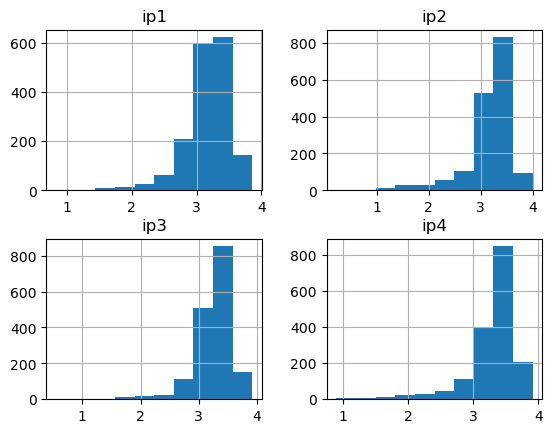

In [3]:
dataset.hist()

In [4]:
dataset['tepat'].value_counts()

Ya       1552
Tidak     135
Name: tepat, dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   object 
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


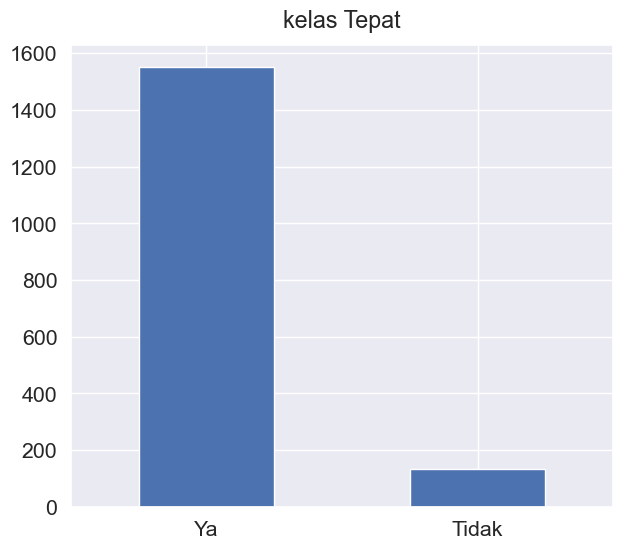

In [6]:
sns.set(font_scale=1.4)
dataset['tepat'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.title("kelas Tepat", y=1.02);

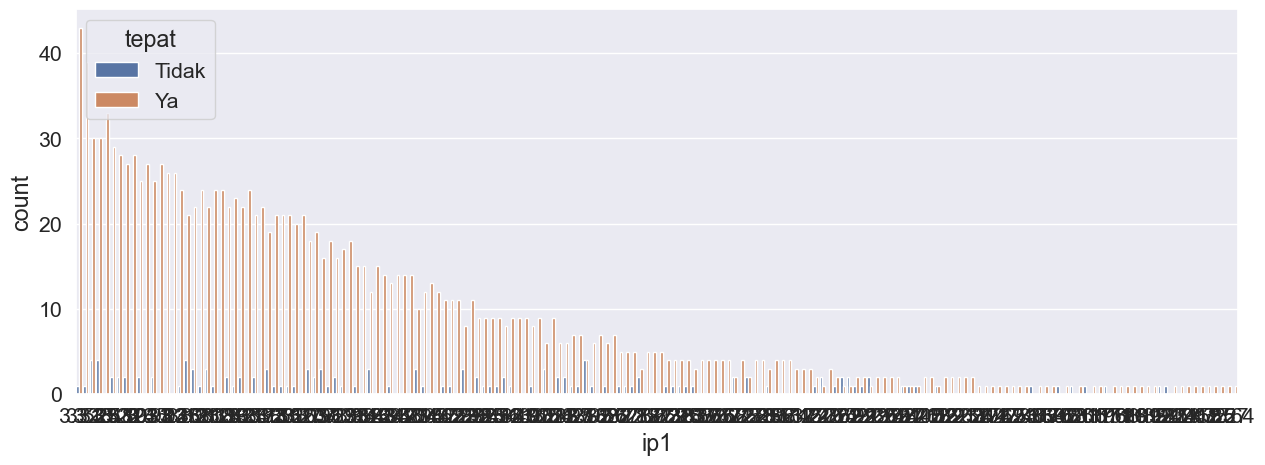

In [7]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['ip1'],order=dataset['ip1'].value_counts().index,hue=dataset['tepat'])
plt.show()

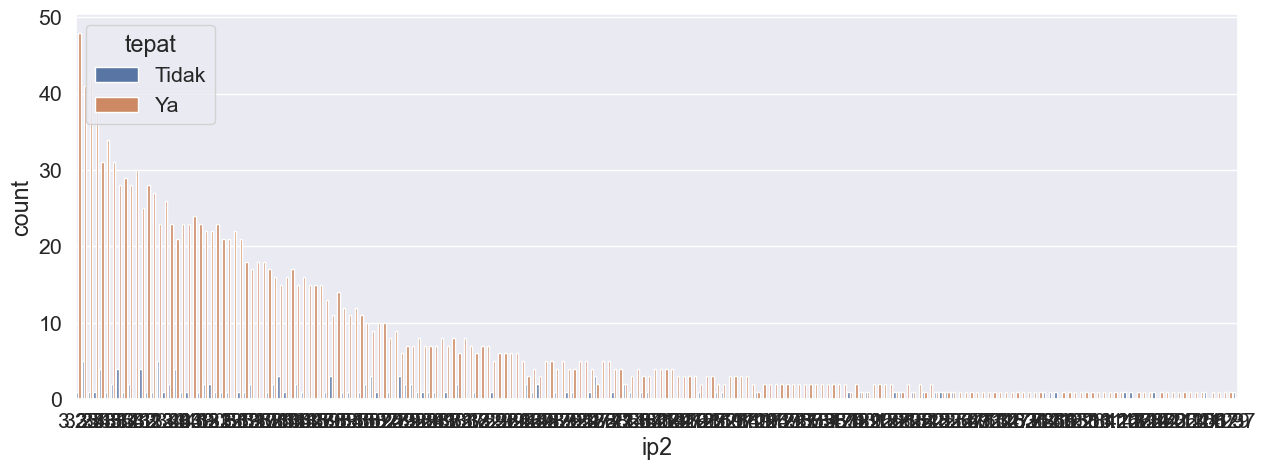

In [8]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['ip2'],order=dataset['ip2'].value_counts().index,hue=dataset['tepat'])
plt.show()

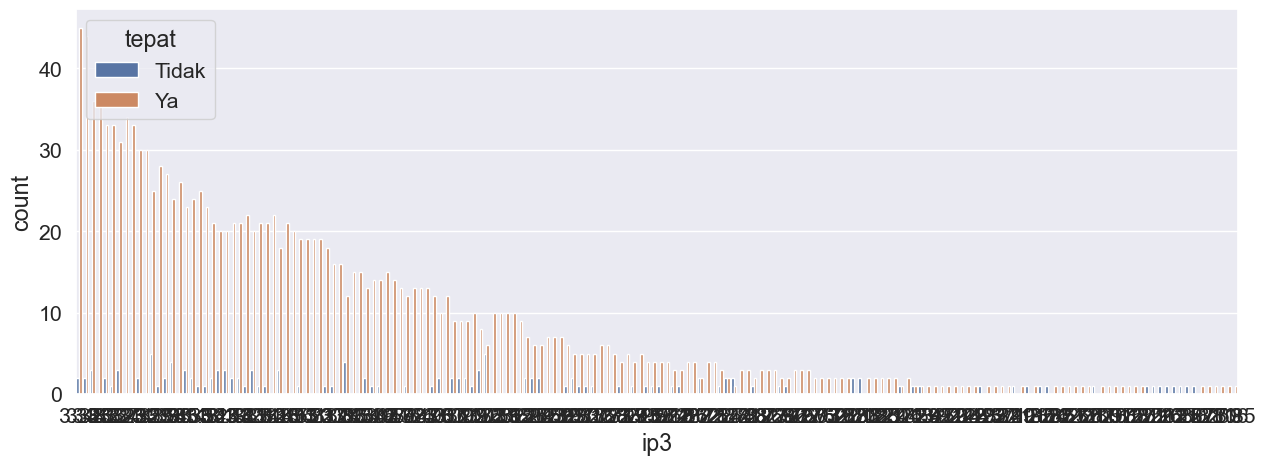

In [9]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['ip3'],order=dataset['ip3'].value_counts().index,hue=dataset['tepat'])
plt.show()

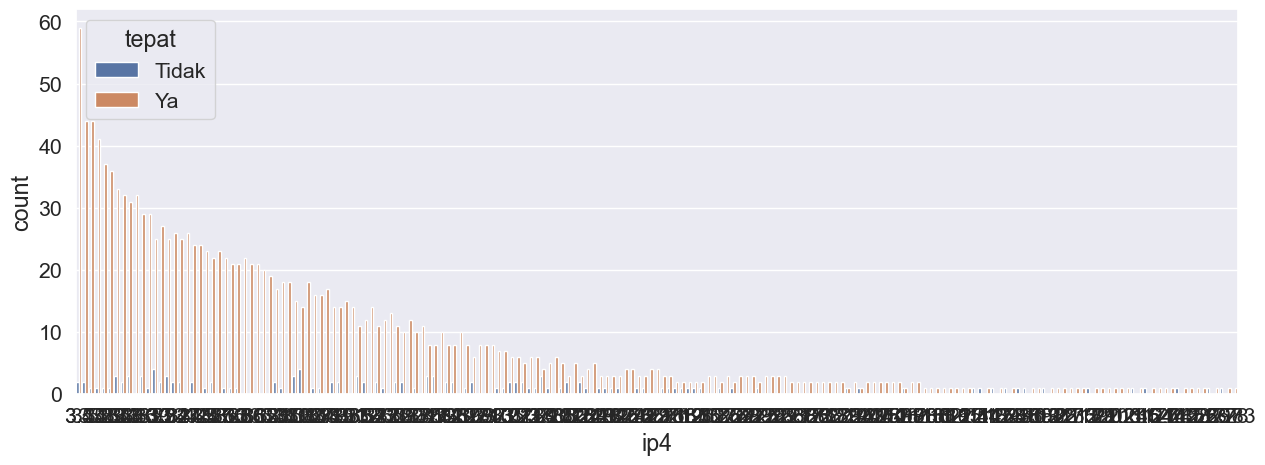

In [10]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['ip4'],order=dataset['ip4'].value_counts().index,hue=dataset['tepat'])
plt.show()

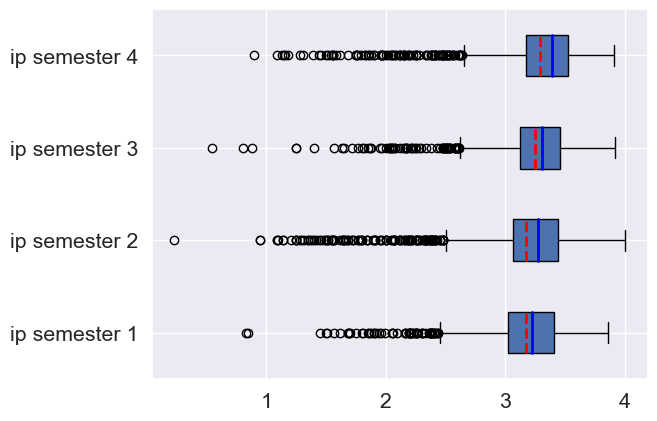

In [11]:
a = dataset['ip1']
b = dataset['ip2']
c = dataset['ip3']
d = dataset['ip4']

fig, ax = plt.subplots()
ax.boxplot((a, b, c,d),
          vert=False,
          showmeans=True,
          meanline=True,
          labels=('ip semester 1', 'ip semester 2', 'ip semester 3','ip semester 4'),
          patch_artist=True,
          medianprops={'linewidth':2, 'color':'blue'},
          meanprops={'linewidth':2, 'color':'red'})
plt.show()

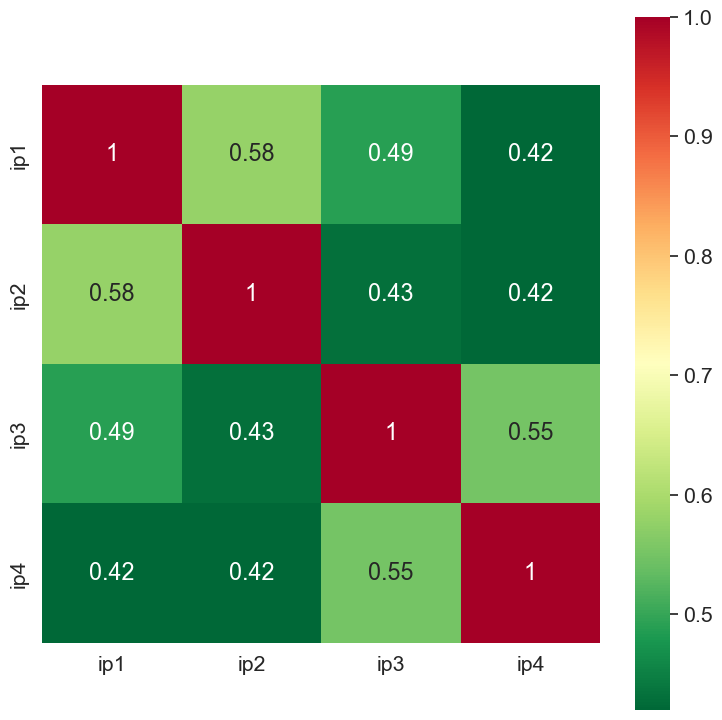

In [12]:
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# DATA CLEANING

In [13]:
dataset.isnull().sum()

ip1      0
ip2      0
ip3      0
ip4      0
tepat    0
dtype: int64

In [14]:
dataset.describe()

,ip1,ip2,ip3,ip4
count,1687.000000,1687.000000,1687.000000,1687.000000
mean,3.174458,3.170551,3.249988,3.285993
std,0.347761,0.454393,0.339506,0.398833
min,0.830000,0.230000,0.550000,0.900000
25%,3.020000,3.060000,3.120000,3.170000
50%,3.220000,3.270000,3.310000,3.390000
75%,3.405000,3.440000,3.460000,3.520000
max,3.860000,4.000000,3.920000,3.910000


In [15]:
dataset.replace({'Ya': 0, 'Tidak': 1 }, inplace=True)
dataset

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,1
1,1.81,1.68,1.57,1.86,1
2,3.07,3.00,2.75,3.21,1
3,2.71,2.33,2.61,1.98,1
4,3.17,3.02,3.28,2.96,1
...,...,...,...,...,...
1682,3.07,3.04,3.39,3.55,0
1683,3.29,3.22,3.33,3.68,0
1684,3.31,3.25,3.44,3.52,0
1685,3.44,3.35,3.50,3.50,0


In [16]:
dataset.isnull().values.any() #Jika True artinya ada data yg hilang

False

In [17]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"{column} : {unique_values}")
    print("====================================")


ip1 : [2.3  1.81 3.07 2.71 3.17 3.16 2.72 2.97 2.78 2.5  2.19 3.43 3.14 3.04
 2.83 2.6  2.98 3.1  2.52 3.06 2.92 3.   2.84 3.02 2.95 3.11 2.91 3.3
 2.88 3.32 3.18 3.22 3.39 2.44 2.68 3.24 3.15 2.57 3.62 3.13 2.8  2.86
 2.87 2.94 2.85 2.99 2.82 2.66 3.25 3.35 3.4  3.49 3.5  2.7  3.12 3.05
 2.89 3.23 2.73 2.76 2.16 2.81 3.19 2.9  2.96 3.28 3.27 2.63 3.21 3.48
 2.33 3.64 2.67 3.34 3.26 3.53 3.52 3.2  2.77 3.75 3.08 3.41 3.42 2.75
 2.36 2.06 3.56 2.21 2.59 3.09 1.94 2.2  2.49 1.96 2.62 2.65 1.57 2.48
 2.93 3.61 3.45 3.68 3.66 3.36 3.55 3.57 2.56 1.69 3.38 3.71 2.58 3.6
 3.47 3.46 3.37 3.58 3.31 2.45 1.51 3.29 1.88 1.9  1.86 1.8  2.05 1.99
 1.85 1.92 2.17 2.25 2.09 2.53 2.41 2.43 2.69 2.55 2.54 1.68 1.75 0.85
 1.5  0.83 3.54 2.27 3.33 2.23 3.03 2.38 3.01 3.51 2.39 2.4  1.62 2.74
 2.47 3.73 1.7  2.51 2.46 3.65 3.86 3.44 3.59 3.77 3.69 3.67 3.7  3.72
 3.76 1.45 3.63 2.64]
ip2 : [1.97 1.68 3.   2.33 3.02 3.45 2.5  3.27 2.61 2.85 1.56 2.92 3.18 2.75
 2.95 2.56 2.72 3.34 2.36 3.5  3.21 1.78 1.5 

In [18]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingdata_df


#missingno.matrix(dataset[missingdata_df])

#karena tidak ada kolom dan baris yg memliki data kosong, maka perintah di atas tidak dapat dijalankan
#perintah diatas bisa dijalankan jika array dari missingData_df memliki nilai

[]

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 66.0 KB


# BALANCE DATA

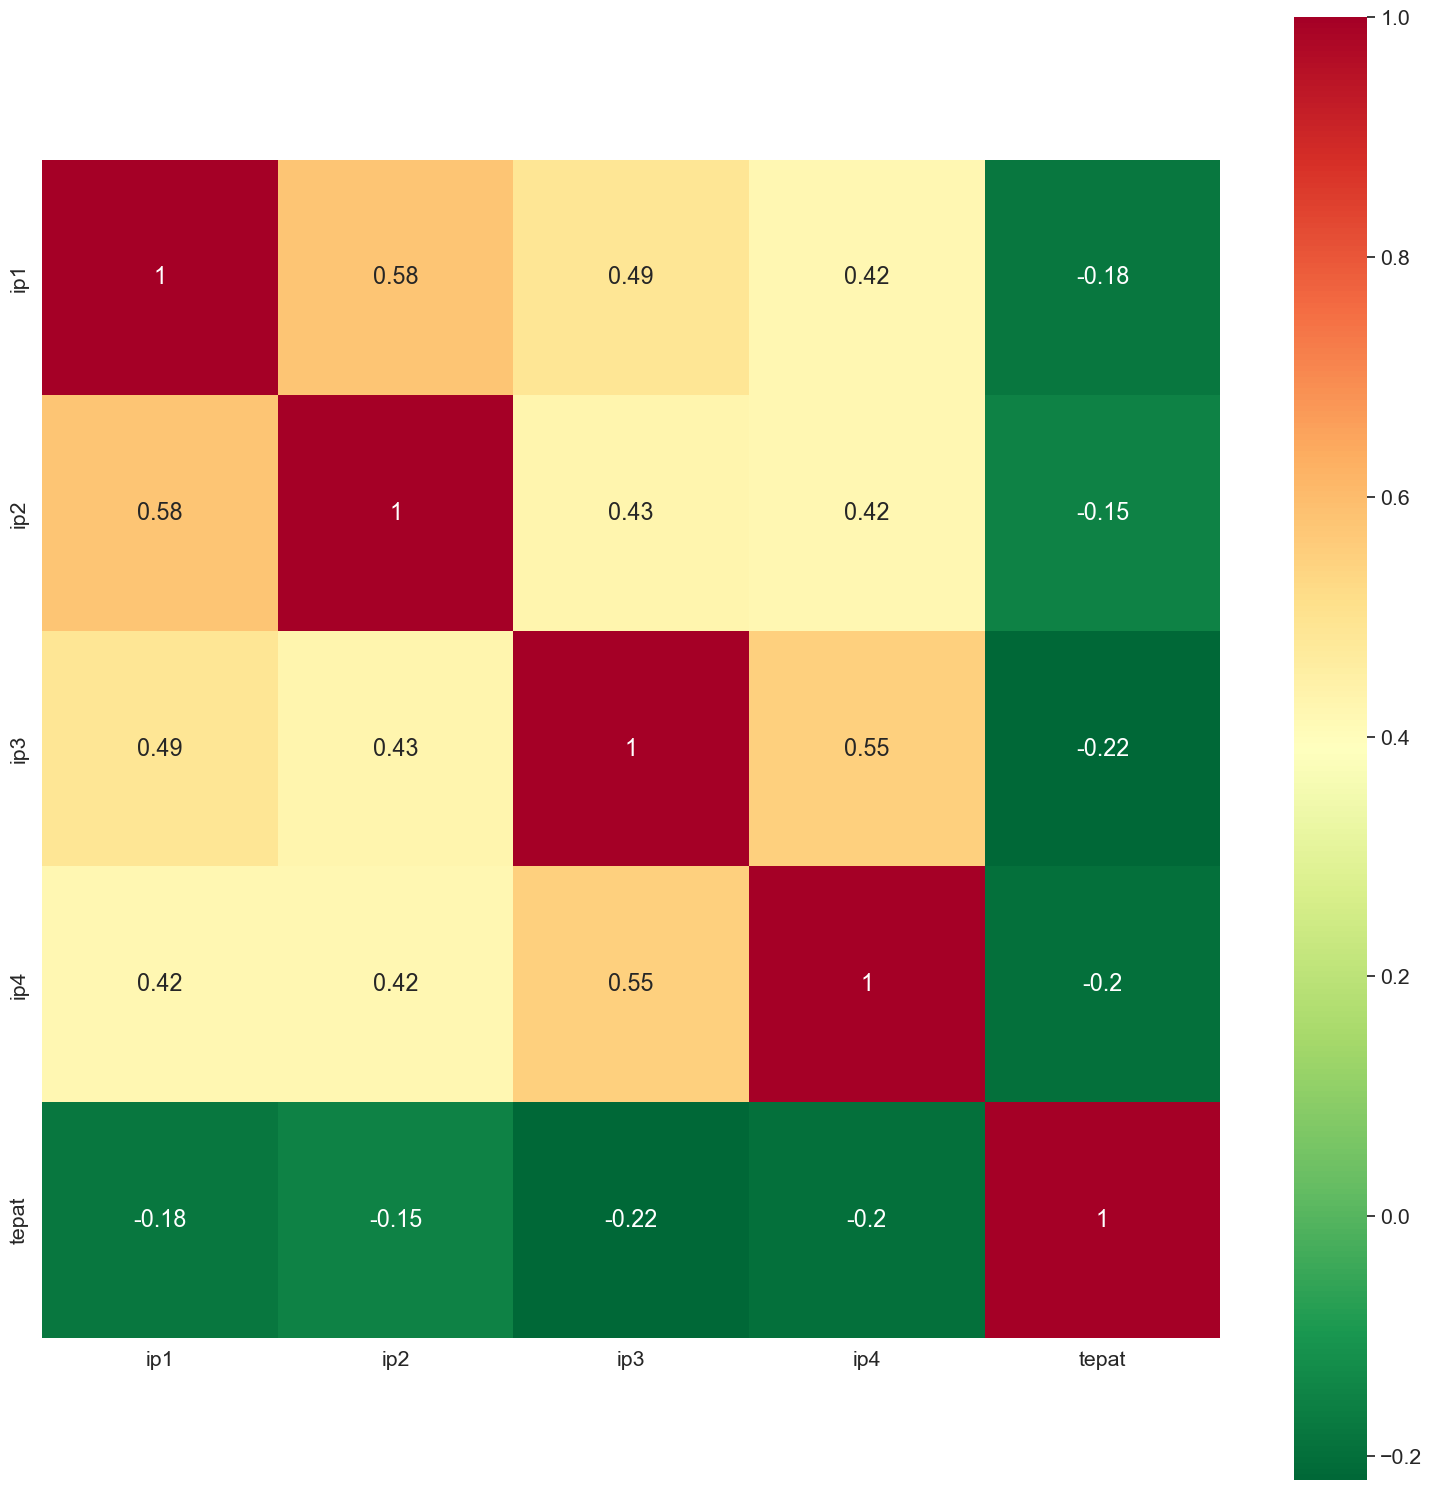

In [20]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [21]:
x = dataset.drop('tepat', axis=1)
y = dataset['tepat']


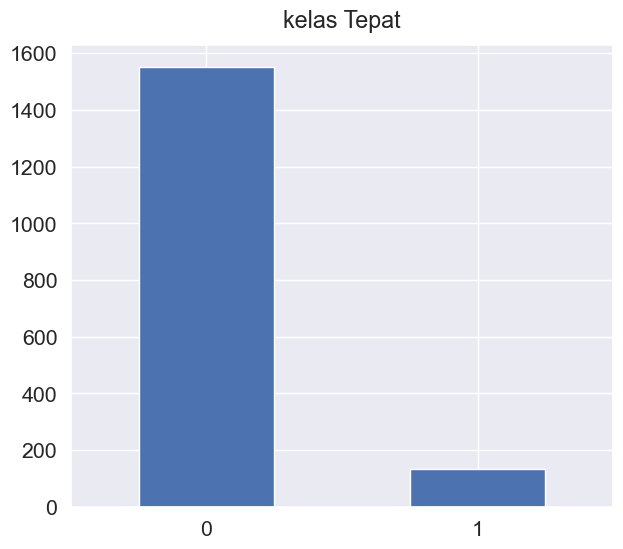

In [22]:
sns.set(font_scale=1.4)
dataset['tepat'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.title("kelas Tepat", y=1.02);

In [23]:
x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.5, 0.5], random_state=42)


dataset = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])
dataset['tepat'] = y


class_balance_info = dataset['tepat'].value_counts()
print("Info Keseimbangan Kelas:")
print(class_balance_info)

print("\nLima Baris Pertama dari DataFrame:")
print(dataset.head())

Info Keseimbangan Kelas:
1    500
0    500
Name: tepat, dtype: int64

Lima Baris Pertama dari DataFrame:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.669356  -1.495778  -0.870766   1.141831   0.021606   1.730630   
1   0.093372   0.785848   0.105754   1.272354  -0.846316  -0.979093   
2  -0.905797  -0.608341   0.295141   0.943716   0.092936   1.370397   
3  -0.585793   0.389279   0.698816   0.436236  -0.315082   0.459505   
4   1.146441   0.515579  -1.222895  -0.396230  -1.293508  -0.352428   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -1.251698   0.289305   0.357163  -0.196811  ...    0.154850   -0.219970   
1   1.263707   0.264020   2.411677  -0.960046  ...    0.199810    0.288724   
2  -0.064772   0.287273  -0.533004  -0.032504  ...   -0.510064   -0.868768   
3   1.448820   0.505558  -1.440982  -1.134020  ...    1.466783    0.678728   
4   0.071254   1.239584   1.007133  -1.479444  ...   -0.918127    0.604121   


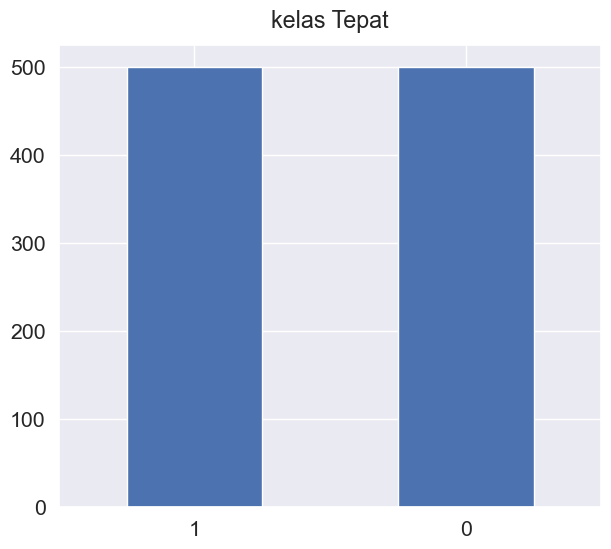

In [24]:
sns.set(font_scale=1.4)
dataset['tepat'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.title("kelas Tepat", y=1.02);

In [25]:
x

array([[-0.6693561 , -1.49577819, -0.87076638, ..., -1.26733697,
        -1.2763343 ,  1.01664321],
       [ 0.09337237,  0.78584826,  0.10575379, ..., -0.12270893,
         0.6934308 ,  0.91136272],
       [-0.90579721, -0.60834121,  0.29514098, ...,  0.83049813,
        -0.73733198, -0.5782121 ],
       ...,
       [-0.20013455, -1.46108168,  1.79701652, ..., -1.50280171,
        -1.27473745,  1.60111869],
       [ 0.03935575,  0.24868361, -0.47532342, ...,  0.09912579,
         0.54269228,  1.20827474],
       [ 0.76921528,  0.47076539,  0.16994471, ...,  0.6561162 ,
         0.64333186, -2.02100232]])

In [26]:
y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [28]:
dataset

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,tepat
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643,1
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199,1
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,...,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325,0
996,-0.410935,-0.546608,1.134924,0.334300,-0.618983,0.693425,-0.617285,1.087727,0.193022,1.461993,...,-1.011037,-0.256734,0.517721,0.593266,-0.629825,-0.080137,-0.246737,-0.486387,2.211333,1
997,-0.200135,-1.461082,1.797017,-0.244096,0.544323,1.776031,-2.021994,-0.658113,0.206816,-0.114789,...,0.542985,-0.420264,-0.748275,1.668697,-1.209965,-1.248582,-1.502802,-1.274737,1.601119,1
998,0.039356,0.248684,-0.475323,-1.136693,1.942577,-1.297109,-0.802722,0.451323,-1.454615,-0.679222,...,0.153528,0.637119,1.235484,0.780224,1.558384,0.263888,0.099126,0.542692,1.208275,0


# MEDELING

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=20)


In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred=model.predict(x_test)
y_pred


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

# EVALUATING MODEL

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {acc:.2f}")

Model accuracy: 0.84
